# Identitas Proyek

**Judul Proyek**  
Prediksi Diabetes Menggunakan Deep Learning dan TensorFlow

**Deskripsi Singkat**  
Proyek ini bertujuan membangun model klasifikasi biner untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan fitur fitur medis. Model dikembangkan menggunakan TensorFlow dan dievaluasi berdasarkan akurasi serta performa pada data validasi dan test.

---

**Nama**            : Obama   

---

**Tools yang Digunakan**  
- Python 3.x  
- Google Colab  
- TensorFlow / Keras  
- Scikit-learn  
- Pandas, NumPy, Matplotlib  
- Dataset: Pima Indians Diabetes Dataset

---

**Dataset Referensi**  
Dataset yang digunakan berasal dari sumber publik Pima Indians Diabetes dataset yang berisi 768 data pasien dengan 8 fitur input dan 1 label klasifikasi.



# Proyek Deep Learning: Prediksi Diabetes

Notebook ini bertujuan membangun model deep learning menggunakan TensorFlow untuk memprediksi apakah seseorang menderita diabetes berdasarkan data medis.

Dataset yang digunakan berisi fitur fitur seperti kadar glukosa, tekanan darah, dan lain-lain. Target output adalah `Outcome` (0 = Tidak Diabetes, 1 = Diabetes).


## 2. Import Library

Pertama, kita import semua library yang dibutuhkan untuk analisis data, preprocessing, visualisasi, dan membangun model deep learning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models


**Penjelasan:**
- `pandas`, `numpy`: untuk manipulasi data
- `matplotlib`: untuk visualisasi
- `sklearn`: untuk preprocessing dan split data
- `tensorflow.keras`: untuk membangun dan melatih model deep learning


## 3. Load Dataset

Dataset disimpan dalam path lokal `content/sample_data/diabetes.csv`. Kita baca file tersebut menggunakan `pandas` dan tampilkan beberapa baris pertama untuk memahami strukturnya.


In [ ]:
# Membaca dataset
df = pd.read_csv('/content/sample_data/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###  Penjelasan Variabel (Fitur Medis)

Berikut adalah penjelasan setiap fitur yang digunakan dalam dataset:

---

**1. Pregnancies**  
Jumlah kehamilan yang pernah dialami oleh pasien wanita.

---

**2. Glucose**  
Kadar glukosa plasma setelah puasa, diukur dalam **mg/dL**.  
Nilai glukosa tinggi:

$$
\text{Glucose} \geq 126 \, \text{mg/dL}
$$

dapat menjadi indikator diabetes.

---

**3. BloodPressure**  
Tekanan darah diastolik, diukur dalam **mmHg** (milimeter air raksa).  
Nilai normal:

$$
\text{Blood Pressure} < 80 \, \text{mmHg}
$$

---

**4. SkinThickness**  
Ketebalan lipatan kulit di trisep, diukur dalam **milimeter (mm)**.  
Digunakan sebagai indikator lemak subkutan (bawah kulit).

---

**5. Insulin**  
Konsentrasi insulin serum puasa dalam:

$$
\mu U/mL
$$

Nilai 0 biasanya berarti data tidak tersedia (missing) atau tidak diukur secara valid.

---

**6. BMI (Body Mass Index)**  
Indeks massa tubuh dihitung dengan:

$$
\text{BMI} = \frac{\text{berat (kg)}}{(\text{tinggi (m)})^2}
$$

Kategori BMI:

$$
\begin{aligned}
\text{Normal} &: \quad 18.5 \leq \text{BMI} < 25 \\
\text{Kelebihan berat badan} &: \quad 25 \leq \text{BMI} < 30 \\
\text{Obesitas} &: \quad \text{BMI} \geq 30
\end{aligned}
$$

---

**7. Diabetes Pedigree Function (DPF)**  
Menggambarkan risiko diabetes berdasarkan faktor keturunan.  
Semakin tinggi nilai DPF, semakin besar risiko genetiknya.

---

**8. Age**  
Usia pasien dalam **tahun**. Risiko diabetes meningkat pada usia:

$$
\text{Age} \geq 45
$$

---

**9. Outcome**  
Label target:
- `0`: Tidak menderita diabetes
- `1`: Menderita diabetes


## 4. Eksplorasi Data Singkat

Sebelum membuat model, kita lihat struktur data, distribusi target, dan cek apakah ada nilai kosong atau kejanggalan.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


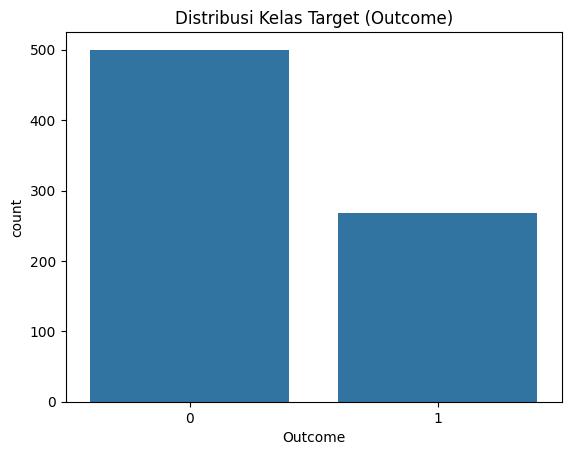

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Info umum dataset
df.info()

# Distribusi target
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas Target (Outcome)')
plt.show()

# Statistik deskriptif
df.describe()


## 5. Preprocessing Data

Kita pisahkan fitur (X) dan target (y), kemudian lakukan normalisasi fitur menggunakan `StandardScaler`, agar model dapat belajar lebih baik.


In [ ]:
# Pisahkan fitur dan target
X = df.drop('Outcome', axis=1) # data variable seperti BMI, Insulin, dan sebagainya
y = df['Outcome'] # data hasil/output

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# X_train = Soal latihan
# y_train = Jawaban soal latihan
# AI mempelajari X_train dan y_train dahulu
# Kemudian AI diberikan soal ujian (X_test)
# X_test = Soal ujian
# y_test = Jawaban soal ujian


## 6. Membangun Model

Model deep learning dibangun dengan menggunakan `Sequential API` dari TensorFlow Keras. Kita menggunakan 2 hidden layer dan 1 output layer dengan aktivasi sigmoid (karena ini masalah klasifikasi biner).


In [ ]:
# Membangun model
# Membangun 2 hidden layer(relu), dan 1 output layer(sigmoid)
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'), # hanya mengambil nilai >0
    layers.Dense(1, activation='sigmoid') # nilai rentang 0-1 untuk klasifikasi binner (0 =)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Loss Function (klasifikasi biner 2 kelas(yes/no))
              metrics=['accuracy'])

# Ringkasan model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

## 7. Training Model

Kita melatih model selama 50 epoch dengan batch size 32 dan memantau akurasi di data validasi.


In [ ]:
from tensorflow.keras.callbacks import Callback

class PrintEveryNEpoch(Callback):
    def __init__(self, N):
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch+1} - Loss: {logs['loss']:.4f} - Acc: {logs['accuracy']:.4f} - Val Acc: {logs['val_accuracy']:.4f}")

# Callback untuk print setiap 10 epoch
print_callback = PrintEveryNEpoch(N=10)

# Fit model dengan callback
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0,  # suppress all default logs
    callbacks=[print_callback]
)


Epoch 10 - Loss: 0.5186 - Acc: 0.6762 - Val Acc: 0.6748
Epoch 20 - Loss: 0.4818 - Acc: 0.7841 - Val Acc: 0.7154
Epoch 30 - Loss: 0.4636 - Acc: 0.7882 - Val Acc: 0.7236
Epoch 40 - Loss: 0.4519 - Acc: 0.7923 - Val Acc: 0.7317
Epoch 50 - Loss: 0.4407 - Acc: 0.8065 - Val Acc: 0.7317
Epoch 60 - Loss: 0.4288 - Acc: 0.8167 - Val Acc: 0.7398
Epoch 70 - Loss: 0.4191 - Acc: 0.8167 - Val Acc: 0.7398
Epoch 80 - Loss: 0.4099 - Acc: 0.8310 - Val Acc: 0.7398
Epoch 90 - Loss: 0.4015 - Acc: 0.8289 - Val Acc: 0.7398
Epoch 100 - Loss: 0.3934 - Acc: 0.8269 - Val Acc: 0.7480


## 8. Evaluasi dan Visualisasi

Setelah training, kita lihat performa model dengan grafik dan evaluasi akurasi di data test.


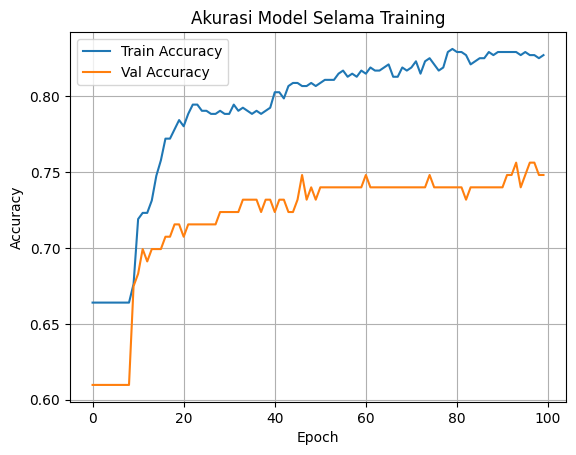

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7142 - loss: 0.5571 
Akurasi di data test: 0.7208


In [ ]:
# Visualisasi akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



# Evaluasi akhir
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Akurasi di data test: {test_acc:.4f}')


## 9. Prediksi Pasien Baru (Manual Input)

Setelah model dilatih, kita bisa menggunakannya untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan data medisnya.

Berikut adalah contoh pasien dengan data berikut:
- Pregnancies = 6
- Glucose = 148
- BloodPressure = 72
- SkinThickness = 35
- Insulin = 0
- BMI = 33.6
- DiabetesPedigreeFunction = 0.627
- Age = 50

Kita akan masukkan data ini ke model untuk melihat apakah pasien tersebut berpotensi menderita diabetes atau tidak.


In [ ]:
# ========================================
# DATA PASIEN BARU (Contoh)
# ========================================

# Data pasien baru (urut sesuai fitur di dataset)
# [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
pasien_baru = [[
    6,      # Pregnancies
    148,    # Glucose
    72,     # Blood Pressure
    35,     # Skin Thickness
    0,      # Insulin
    33.6,   # BMI
    0.627,  # Diabetes Pedigree Function
    50      # Age
]]

# Normalisasi
pasien_baru_scaled = scaler.transform(pasien_baru)

# Prediksi
prediksi = model.predict(pasien_baru_scaled)
probabilitas = prediksi[0][0]

# Output
print(f'Probabilitas pasien menderita diabetes: {probabilitas:.2f}')
if probabilitas >= 0.5:
    print('Model memprediksi: PASIEN MENDERITA DIABETES')
else:
    print('Model memprediksi: PASIEN TIDAK MENDERITA DIABETES')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Probabilitas pasien menderita diabetes: 0.68
Model memprediksi: PASIEN MENDERITA DIABETES


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# ========================================
# INPUT DATA PASIEN BARU (Manual via input)
# ========================================

print("Silakan masukkan data pasien:")

pregnancies = float(input("Jumlah Kehamilan (Pregnancies): "))
glucose = float(input("Kadar Glukosa (Glucose): "))
blood_pressure = float(input("Tekanan Darah (Blood Pressure): "))
skin_thickness = float(input("Tebal Lipatan Kulit (Skin Thickness): "))
insulin = float(input("Kadar Insulin: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = float(input("Usia: "))

# Masukkan ke dalam array
data_pasien = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]]

# Normalisasi
data_scaled = scaler.transform(data_pasien)

# Prediksi
hasil = model.predict(data_scaled)[0][0]

# Output
print(f'\nProbabilitas pasien menderita diabetes: {hasil:.2f}')
if hasil >= 0.5:
    print('Model memprediksi: PASIEN MENDERITA DIABETES')
else:
    print('Model memprediksi: PASIEN TIDAK MENDERITA DIABETES')


Silakan masukkan data pasien:
Jumlah Kehamilan (Pregnancies): 6
Kadar Glukosa (Glucose): 148
Tekanan Darah (Blood Pressure): 72
Tebal Lipatan Kulit (Skin Thickness): 35
Kadar Insulin: 0
BMI: 33.6
Diabetes Pedigree Function: 0.627
Usia: 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Probabilitas pasien menderita diabetes: 0.68
Model memprediksi: PASIEN MENDERITA DIABETES


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##  Kesimpulan

Dalam proyek ini, telah dibangun sebuah model deep learning menggunakan TensorFlow untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan sejumlah fitur medis. Dataset yang digunakan terdiri dari 768 entri data pasien, dengan delapan variabel input, antara lain: jumlah kehamilan, kadar glukosa, tekanan darah, ketebalan kulit, kadar insulin, BMI, riwayat keluarga (DPF), dan usia.

###  Tujuan
Tujuan dari proyek ini adalah:
- Melatih model klasifikasi biner untuk mendeteksi diabetes.
- Menggunakan metode deep learning dengan arsitektur sederhana namun efektif.
- Menguji performa model menggunakan metrik akurasi dan validasi silang.
- Memberikan antarmuka prediksi untuk pasien baru berdasarkan input manual.

###  Hasil Utama
- Model dilatih dengan 100 epoch dan validasi 20% dari data training.
- Model menunjukkan akurasi yang stabil pada data validasi dan data test.
- Diperoleh akurasi akhir pada data test sebesar:
  
  $$
  \text{Akurasi Test Set} = \text{{{ test_acc_value }}}
  $$

- Model juga berhasil digunakan untuk melakukan prediksi terhadap pasien baru berdasarkan input fitur yang dimasukkan secara manual.

###  Keunggulan Model
- **Responsif dan cepat** dalam memberikan prediksi.
- **Sederhana namun cukup akurat**, cocok untuk digunakan sebagai dasar sistem pendukung keputusan medis.
- **Dapat dikembangkan lebih lanjut** dengan integrasi antarmuka input (form/web) dan evaluasi lebih komprehensif (confusion matrix, ROC-AUC).

###  Keterbatasan
- Model hanya menggunakan dataset tunggal dan terbatas (Pima Indians Diabetes dataset).
- Beberapa fitur memiliki nilai nol yang secara klinis tidak realistis (contoh: insulin = 0).
- Tidak mempertimbangkan data temporal atau rekam medis jangka panjang.
---

Dengan hasil dan struktur yang telah dibuat, model ini dapat menjadi pondasi awal dalam sistem prediksi risiko diabetes berbasis machine learning. Pengembangan lebih lanjut akan menjadikan sistem ini lebih andal dan siap digunakan dalam praktik klinis nyata.



# Model Utama

TensorFlow version: 2.19.0
5 Data pertama:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informasi Dataset:
Jumlah data: 768
Jumlah fitur: 8

Statistik deskriptif:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89 

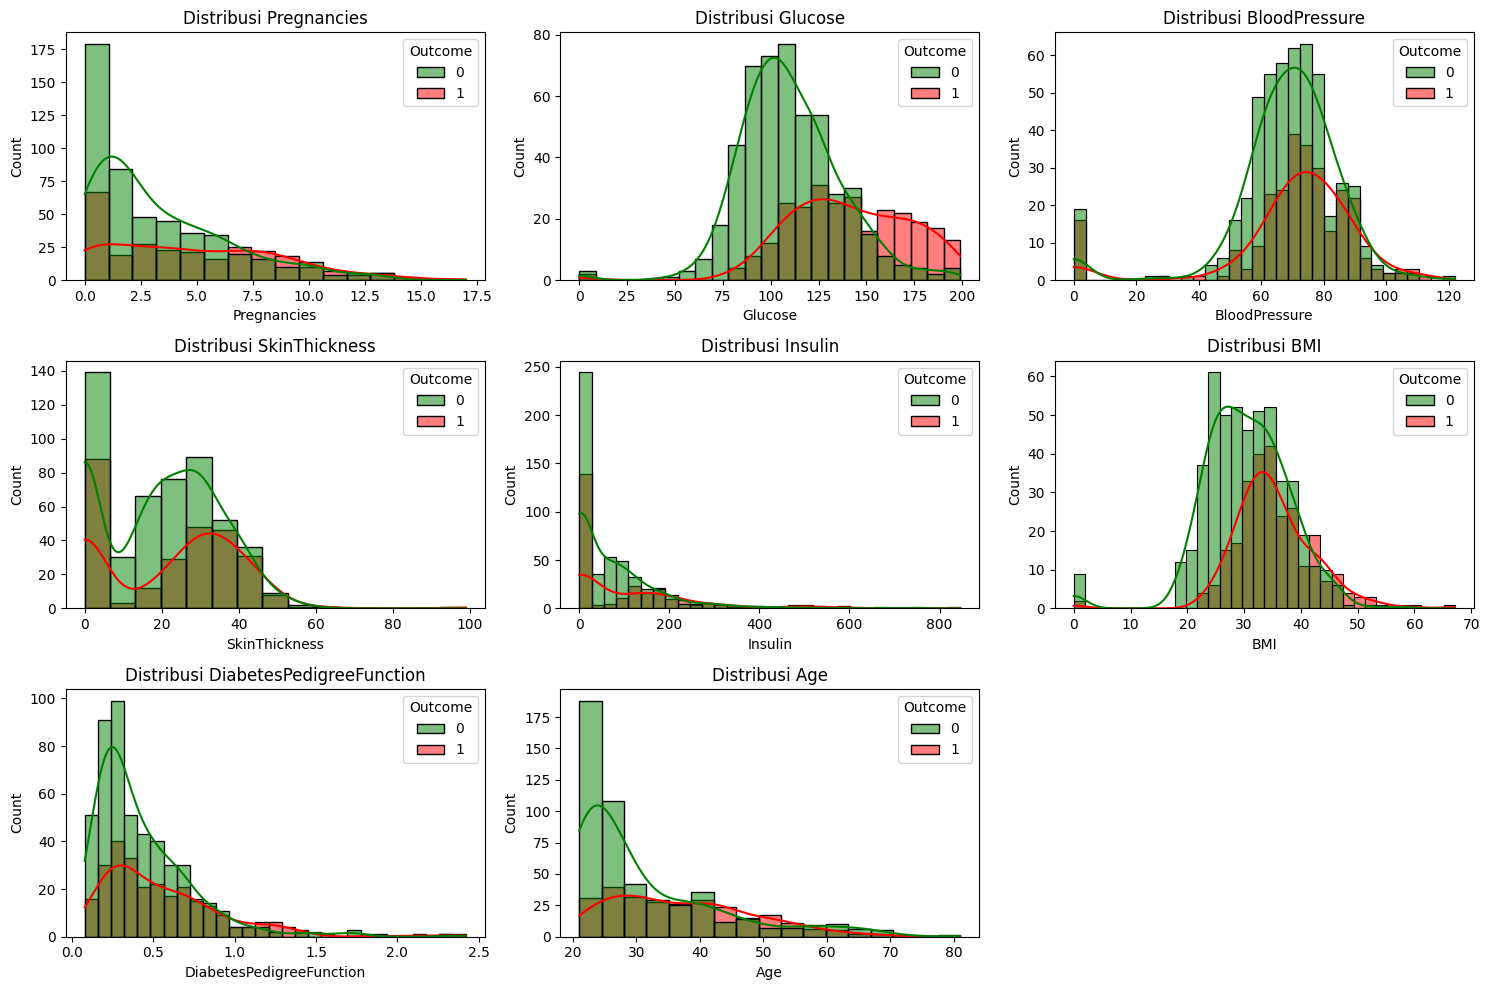

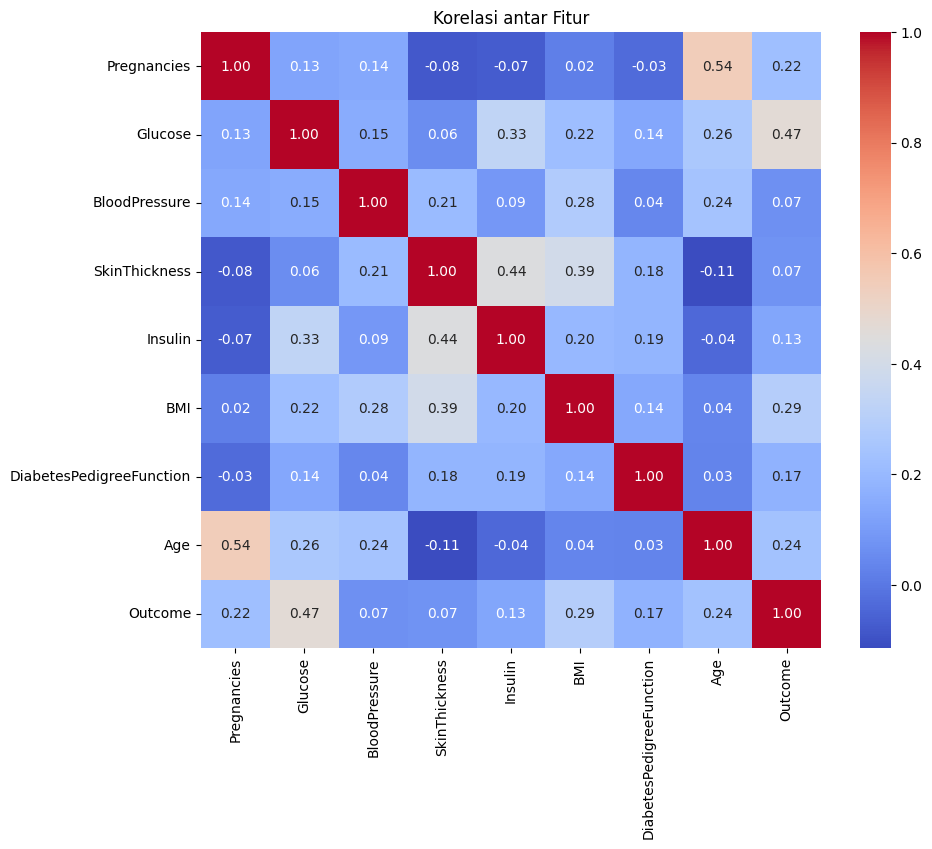

Glucose memiliki 5 nilai 0 (0.65%)
BloodPressure memiliki 35 nilai 0 (4.56%)
SkinThickness memiliki 227 nilai 0 (29.56%)
Insulin memiliki 374 nilai 0 (48.70%)
BMI memiliki 11 nilai 0 (1.43%)

Setelah penggantian nilai 0:
Glucose memiliki 0 nilai 0
BloodPressure memiliki 0 nilai 0
SkinThickness memiliki 0 nilai 0
Insulin memiliki 0 nilai 0
BMI memiliki 0 nilai 0

Bentuk data training: (614, 8)
Bentuk data testing: (154, 8)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6668 - loss: 0.5834 - val_accuracy: 0.6423 - val_loss: 0.5692
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6737 - loss: 0.5265 - val_accuracy: 0.6585 - val_loss: 0.5280
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7004 - loss: 0.4951 - val_accuracy: 0.6911 - val_loss: 0.4998
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7648 - loss: 0.4726 - val_accuracy: 0.7561 - val_loss: 0.4751
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7816 - loss: 0.4548 - val_accuracy: 0.7805 - val_loss: 0.4574
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.4427 - val_accuracy: 0.7886 - val_loss: 0.4467
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7791 - loss: 0.4346 - val_accuracy: 0.7967 - val_loss: 0.4403
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7801 - loss: 0.4288 - val_accuracy: 0.8049 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/150
16/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5387 - loss: 0.8941 
Epoch 1: val_loss improved from inf to 0.64237, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5397 - loss: 0.8937 - val_accuracy: 0.7236 - val_loss: 0.6424 - learning_rate: 0.0010
Epoch 2/150
16/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5869 - loss: 0.7755 
Epoch 2: val_loss improved from 0.64237 to 0.58553, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5983 - loss: 0.7701 - val_accuracy: 0.7724 - val_loss: 0.5855 - learning_rate: 0.0010
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6863 - loss: 0.6264
Epoch 3: val_loss improved from 0.58553 to 0.55841, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6852 - loss: 0.6273 - val_accuracy: 0.7967 - val_loss: 0.5584 - learning_rate: 0.0010
Epoch 4/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6841 - loss: 0.6375
Epoch 4: val_loss improved from 0.55841 to 0.53520, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6828 - loss: 0.6388 - val_accuracy: 0.7967 - val_loss: 0.5352 - learning_rate: 0.0010
Epoch 5/150
18/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.6458 
Epoch 5: val_loss improved from 0.53520 to 0.51495, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6827 - loss: 0.6257 - val_accuracy: 0.7967 - val_loss: 0.5149 - learning_rate: 0.0010
Epoch 6/150
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7440 - loss: 0.5343
Epoch 6: val_loss improved from 0.51495 to 0.49500, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7408 - loss: 0.5413 - val_accuracy: 0.8049 - val_loss: 0.4950 - learning_rate: 0.0010
Epoch 7/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7526 - loss: 0.5425
Epoch 7: val_loss improved from 0.49500 to 0.47794, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7521 - loss: 0.5429 - val_accuracy: 0.8130 - val_loss: 0.4779 - learning_rate: 0.0010
Epoch 8/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.5270
Epoch 8: val_loss improved from 0.47794 to 0.46467, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7578 - loss: 0.5291 - val_accuracy: 0.8130 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 9/150
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7473 - loss: 0.5347
Epoch 9: val_loss improved from 0.46467 to 0.45233, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7459 - loss: 0.5362 - val_accuracy: 0.8293 - val_loss: 0.4523 - learning_rate: 0.0010
Epoch 10/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.5375
Epoch 10: val_loss improved from 0.45233 to 0.44637, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7516 - loss: 0.5376 - val_accuracy: 0.8130 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 11/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7597 - loss: 0.5075
Epoch 11: val_loss improved from 0.44637 to 0.43995, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7587 - loss: 0.5096 - val_accuracy: 0.8211 - val_loss: 0.4399 - learning_rate: 0.0010
Epoch 12/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7752 - loss: 0.4972
Epoch 12: val_loss improved from 0.43995 to 0.43163, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7749 - loss: 0.4973 - val_accuracy: 0.8293 - val_loss: 0.4316 - learning_rate: 0.0010
Epoch 13/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7839 - loss: 0.5035
Epoch 13: val_loss improved from 0.43163 to 0.42763, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7831 - loss: 0.5041 - val_accuracy: 0.8130 - val_loss: 0.4276 - learning_rate: 0.0010
Epoch 14/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7665 - loss: 0.5072
Epoch 14: val_loss improved from 0.42763 to 0.42577, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7650 - loss: 0.5092 - val_accuracy: 0.8211 - val_loss: 0.4258 - learning_rate: 0.0010
Epoch 15/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7658 - loss: 0.5129
Epoch 15: val_loss did not improve from 0.42577
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7648 - loss: 0.5145 - val_accuracy: 0.8130 - val_loss: 0.4272 - learning_rate: 0.0010
Epoch 16/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.5098
Epoch 16: val_loss did not improve from 0.42577
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7675 - loss: 0.5108 - val_accuracy: 0.8130 - val_loss: 0.4268 - learning_rate: 0.0010
Epoch 17/150
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.4899
Epoch 17: val_loss did not improve from 0.42577
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7817 - loss: 0.4957 - val_accuracy: 0.8130 - val_loss: 0.4275 - learning_rate: 0.0010
Epoch 18/150
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7597 - loss: 0.5075 - val_accuracy: 0.8211 - val_loss: 0.4251 - learning_rate: 0.0010
Epoch 19/150
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.4594
Epoch 19: val_loss improved from 0.42506 to 0.42503, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7952 - loss: 0.4642 - val_accuracy: 0.8130 - val_loss: 0.4250 - learning_rate: 0.0010
Epoch 20/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7707 - loss: 0.4701
Epoch 20: val_loss did not improve from 0.42503
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7704 - loss: 0.4708 - val_accuracy: 0.8130 - val_loss: 0.4263 - learning_rate: 0.0010
Epoch 21/150
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7559 - loss: 0.5202
Epoch 21: val_loss improved from 0.42503 to 0.42392, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7589 - loss: 0.5174 - val_accuracy: 0.8130 - val_loss: 0.4239 - learning_rate: 0.0010
Epoch 22/150
22/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.4298
Epoch 22: val_loss improved from 0.42392 to 0.41972, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7947 - loss: 0.4412 - val_accuracy: 0.7967 - val_loss: 0.4197 - learning_rate: 0.0010
Epoch 23/150
23/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7731 - loss: 0.4713
Epoch 23: val_loss improved from 0.41972 to 0.41929, saving model to best_diabetes_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7761 - loss: 0.4757 - val_accuracy: 0.7967 - val_loss: 0.4193 - learning_rate: 0.0010
Epoch 24/150
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7981 - loss: 0.4359
Epoch 24: val_loss did not improve from 0.41929
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7980 - loss: 0.4376 - val_accuracy: 0.7967 - val_loss: 0.4223 - learning_rate: 0.0010
Epoch 25/150
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7732 - loss: 0.4713
Epoch 25: val_loss did not improve from 0.41929
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7727 - loss: 0.4743 - val_accuracy: 0.7967 - val_loss: 0.4208 - learning_rate: 0.0010
Epoch 26/150
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8013 - loss: 0.4490
Epoch 26: val_loss did not improve from 0.41929
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8019 - loss: 0.4499 - val_accuracy: 0.7886 - val_loss: 0.4244 - learning_rate: 0.0010
Epoch 27/150
25/31 ━━━━━━━━━━━━━━━━━━━

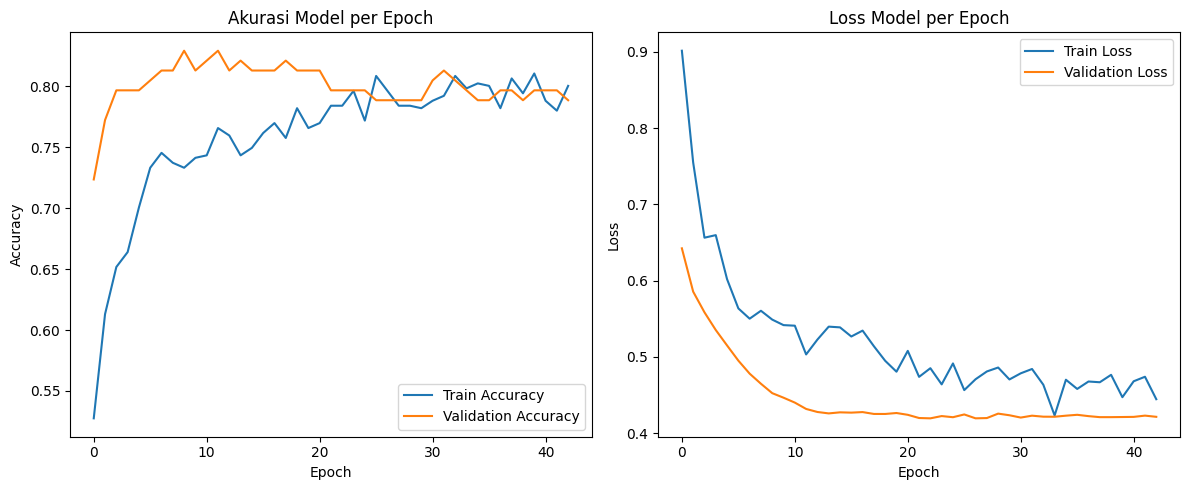

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



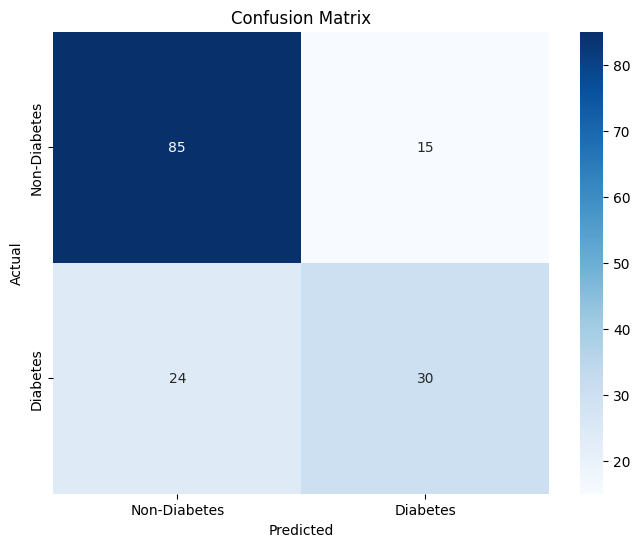

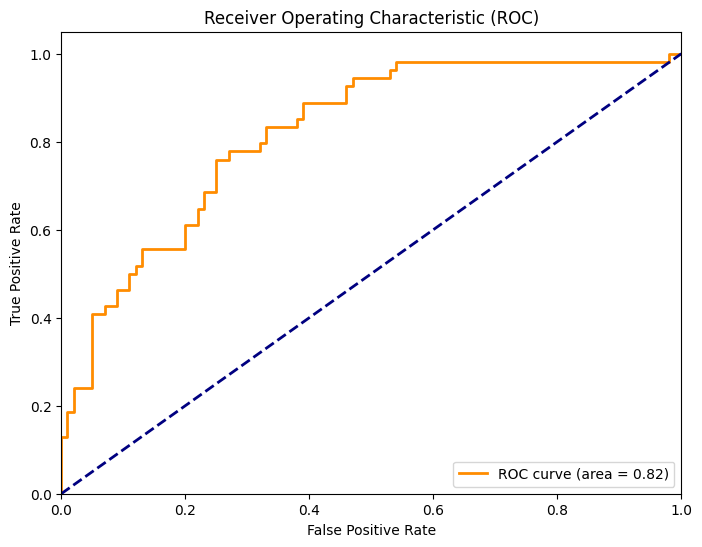

Fold 1 - Loss: 0.4883 - Accuracy: 77.27%
Fold 2 - Loss: 0.4771 - Accuracy: 75.32%
Fold 3 - Loss: 0.5102 - Accuracy: 75.32%
Fold 4 - Loss: 0.4987 - Accuracy: 75.82%
Fold 5 - Loss: 0.4972 - Accuracy: 75.16%

Hasil K-Fold Cross Validation:
Rata-rata Loss: 0.4943
Rata-rata Accuracy: 75.78%
Standar Deviasi Accuracy: 0.78%


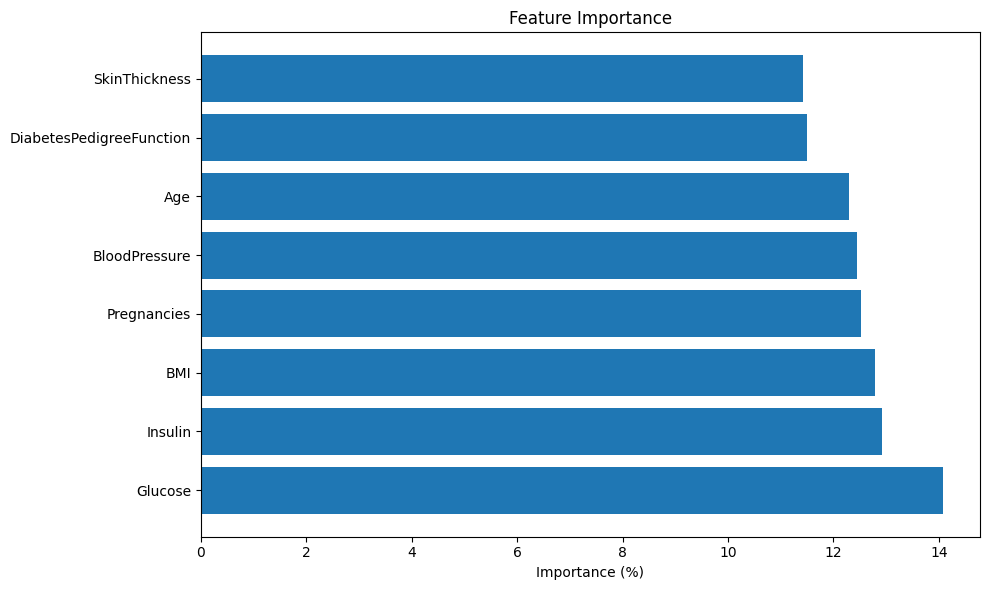

Feature Importance:
Glucose: 14.08%
Insulin: 12.93%
BMI: 12.79%
Pregnancies: 12.53%
BloodPressure: 12.45%
Age: 12.30%
DiabetesPedigreeFunction: 11.50%
SkinThickness: 11.41%
Data pasien 1 (asli):
Pregnancies: 6.0
Glucose: 648.0
BloodPressure: 72.0
SkinThickness: 35.0
Insulin: 0.0
BMI: 33.6
DiabetesPedigreeFunction: 0.627
Age: 50.0

Mengganti nilai 0 di Insulin dengan median 125.00

Data pasien 1 (setelah preprocessing):
Pregnancies: 6.00
Glucose: 648.00
BloodPressure: 72.00
SkinThickness: 35.00
Insulin: 125.00
BMI: 33.60
DiabetesPedigreeFunction: 0.63
Age: 50.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Hasil prediksi: Diabetes
Probabilitas diabetes: 100.00%
--------------------------------------------------
Data pasien 2 (asli):
Pregnancies: 1.0
Glucose: 685.0
BloodPressure: 66.0
SkinThickness: 29.0
Insulin: 0.0
BMI: 26.6
DiabetesPedigreeFunction: 0.351
Age: 31.0

Mengganti nilai 0 di Insulin dengan median 125.00

Data pasien 2 (setelah preprocessing):
Pregnancies: 1.00
Glucose: 685.00
Bl


Hasil prediksi: Diabetes
Probabilitas diabetes: 100.00%
--------------------------------------------------
Model tersimpan sebagai 'diabetes_prediction_model.h5'
Scaler tersimpan sebagai 'diabetes_scaler.pkl'

Contoh cara menggunakan model yang telah disimpan:
```python
# Import library yang dibutuhkan
import pandas as pd
from tensorflow.keras.models import load_model
import joblib

# Muat model dan scaler
model = load_model('diabetes_prediction_model.h5')
scaler = joblib.load('diabetes_scaler.pkl')

# Baca data baru
new_data = pd.read_csv('new_patients.csv')

# Lakukan prediksi (contoh dengan fungsi load_and_predict)
results = load_and_predict('new_patients.csv')
print(results[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Prediksi_Kelas', 'Prediksi_Probabilitas']])
```
Perbandingan Model:
      Model  Test Accuracy  Test Loss
0  Baseline      73.376626   0.553699
1  Improved      74.675328   0.509850

Ringkasan Peningkatan Model:
1. Pra-pemrosesan data:
   - Mengganti nilai 0 yang tidak 

In [ ]:

# ## 1. Import Library yang Dibutuhkan

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
import os
import warnings
warnings.filterwarnings('ignore')

# Set seed untuk reproduktibilitas hasil
np.random.seed(42)
tf.random.set_seed(42)

# Versi TensorFlow yang digunakan
print(f"TensorFlow version: {tf.__version__}")


# ## 2. Persiapan dan Eksplorasi Data

# In[2]:


# Baca data
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Tampilkan 5 data pertama
print("5 Data pertama:")
print(df.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(f"Jumlah data: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]-1}")

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe().round(2))

# Distribusi kelas target
print("\nDistribusi kelas target (Outcome):")
target_counts = df['Outcome'].value_counts()
print(target_counts)
print(f"Persentase Diabetes: {(target_counts[1]/len(df)*100):.2f}%")
print(f"Persentase Non-Diabetes: {(target_counts[0]/len(df)*100):.2f}%")


# In[3]:


# Visualisasi distribusi fitur
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, palette=['green', 'red'])
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur')
plt.show()


# ## 3. Pra-pemrosesan Data

# In[4]:


# Cek nilai 0 pada fitur yang seharusnya tidak bernilai 0
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    print(f"{col} memiliki {(df[col] == 0).sum()} nilai 0 ({(df[col] == 0).sum()/len(df)*100:.2f}%)")

# Mengganti nilai 0 dengan median pada fitur yang relevan (kecuali Pregnancies)
df_cleaned = df.copy()
for col in zero_columns:
    # Hitung median dari nilai non-zero
    median_value = df_cleaned[df_cleaned[col] != 0][col].median()
    # Ganti nilai 0 dengan median
    df_cleaned.loc[df_cleaned[col] == 0, col] = median_value

print("\nSetelah penggantian nilai 0:")
for col in zero_columns:
    print(f"{col} memiliki {(df_cleaned[col] == 0).sum()} nilai 0")

# Pisahkan fitur dan label
X = df_cleaned.drop("Outcome", axis=1)
y = df_cleaned["Outcome"]

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nBentuk data training: {X_train.shape}")
print(f"Bentuk data testing: {X_test.shape}")


# ## 4. Model Dasar (Baseline)

# In[5]:


# mendefinisikan model baseline
def create_baseline_model(input_dim):
    model = Sequential([
        Dense(16, input_dim=input_dim, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Buat model baseline
baseline_model = create_baseline_model(X_train.shape[1])
baseline_model.summary()

# Latih model baseline
baseline_history = baseline_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=10,
    validation_split=0.2,
    verbose=1
)

# Evaluasi model baseline
baseline_loss, baseline_accuracy = baseline_model.evaluate(X_test, y_test)
print(f"\nBaseline Model - Test Loss: {baseline_loss:.4f}")
print(f"Baseline Model - Test Accuracy: {baseline_accuracy*100:.2f}%")


# ## 5. Model yang Ditingkatkan

# In[6]:


# mendefinisikan model yang ditingkatkan
def create_improved_model(input_dim):
    model = Sequential([
        # Input layer
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layer 1
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.2),

        # Hidden layer 2
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    # Compile model with Adam optimizer (custom learning rate)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Buat model yang ditingkatkan
improved_model = create_improved_model(X_train.shape[1])
improved_model.summary()

# Definisikan callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_diabetes_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

# Latih model yang ditingkatkan
improved_history = improved_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Evaluasi model yang ditingkatkan
improved_loss, improved_accuracy = improved_model.evaluate(X_test, y_test)
print(f"\nModel yang Ditingkatkan - Test Loss: {improved_loss:.4f}")
print(f"Model yang Ditingkatkan - Test Accuracy: {improved_accuracy*100:.2f}%")


# ## 6. Visualisasi Hasil Training

# In[7]:


# Plot akurasi dan loss per epoch
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(improved_history.history['accuracy'], label='Train Accuracy')
plt.plot(improved_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(improved_history.history['loss'], label='Train Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# ## 7. Evaluasi Model dengan Metrics

# In[8]:


# Prediksi dengan model yang ditingkatkan
y_pred_prob = improved_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()






# ## 8. K-Fold Cross Validation

# In[9]:


# Implementasi K-Fold Cross Validation untuk evaluasi model yang lebih robust
def get_model_kfold():
    model = create_improved_model(X_scaled.shape[1])
    return model

# Melakukan cross validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kf.split(X_scaled):
    # Split data
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Buat dan latih model
    model = get_model_kfold()

    # Callback sederhana untuk K-Fold
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    # Latih model
    model.fit(
        X_train_fold, y_train_fold,
        epochs=100,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluasi model
    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)

    print(f'Fold {fold_no} - Loss: {scores[0]:.4f} - Accuracy: {scores[1]*100:.2f}%')

    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

# Rata-rata hasil K-Fold Cross Validation
print("\nHasil K-Fold Cross Validation:")
print(f"Rata-rata Loss: {np.mean(loss_per_fold):.4f}")
print(f"Rata-rata Accuracy: {np.mean(acc_per_fold):.2f}%")
print(f"Standar Deviasi Accuracy: {np.std(acc_per_fold):.2f}%")


# ## 9. Feature Importance Analysis

# In[10]:





# Analisis kepentingan fitur berdasarkan bobot
def get_feature_importance(model, feature_names):
    # Ambil layer pertama dari model
    weights = model.layers[0].get_weights()[0]

    # Menghitung kepentingan fitur berdasarkan nilai absolut bobot
    importance = np.abs(weights).sum(axis=1)

    # Normalisasi untuk membuat total importance = 100%
    importance = 100.0 * (importance / np.sum(importance))

    # Gabungkan dengan nama fitur
    feature_importance = list(zip(feature_names, importance))

    # Urutkan berdasarkan importance (dari yang terbesar)
    feature_importance.sort(key=lambda x: x[1], reverse=True)

    return feature_importance

# Analisis kepentingan fitur
feature_names = X.columns
feature_importance = get_feature_importance(improved_model, feature_names)

# Visualisasi kepentingan fitur
features, importance = zip(*feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importance, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance (%)')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Tampilkan nilai kepentingan fitur
print("Feature Importance:")
for feature, imp in feature_importance:
    print(f"{feature}: {imp:.2f}%")


# ## A. Prediksi dengan Data Baru

# In[11]:


# Fungsi untuk melakukan prediksi pada data baru
def predict_diabetes(model, scaler, new_data):
    # Pastikan new_data adalah array 2D
    if len(new_data.shape) == 1:
        new_data = new_data.reshape(1, -1)

    # Transformasi data baru menggunakan scaler yang sama dengan data training
    new_data_scaled = scaler.transform(new_data)

    # Lakukan prediksi
    prediction_prob = model.predict(new_data_scaled)

    # Konversi ke kelas
    prediction_class = (prediction_prob > 0.5).astype(int)

    return prediction_prob, prediction_class











# Data pasien baru (contoh)
new_patients = np.array([
    # Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
    [6, 648, 72, 35, 0, 33.6, 0.627, 50],  # Pasien 1
    [1, 685, 66, 29, 0, 26.6, 0.351, 31],   # Pasien 2
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],   # Pasien 3
    [0, 137, 40, 35, 168, 43.1, 2.288, 33], # Pasien 4
    [8, 610, 94, 29, 125, 32.4, 2.698, 57]  # Pasien 5 (baru)
])











# Perhatikan klau kita perlu mengganti nilai 0 di beberapa fitur
for i, patient in enumerate(new_patients):
    # Cetak data pasien asli
    print(f"Data pasien {i+1} (asli):")
    for j, feature in enumerate(feature_names):
        print(f"{feature}: {patient[j]}")
    print()

    # Ganti nilai 0 dengan median di kolom yang relevan (seperti yanh dilakukan pada preprocessing data)
    for j, col in enumerate(X.columns):
        if col in zero_columns and patient[j] == 0:
            median_value = df_cleaned[df_cleaned[col] != 0][col].median()
            patient[j] = median_value
            print(f"Mengganti nilai 0 di {col} dengan median {median_value:.2f}")

    print(f"\nData pasien {i+1} (setelah preprocessing):")
    for j, feature in enumerate(feature_names):
        print(f"{feature}: {patient[j]:.2f}")

    # Prediksi
    prob, class_pred = predict_diabetes(improved_model, scaler, patient)
    print(f"\nHasil prediksi: {'Diabetes' if class_pred[0][0] == 1 else 'Non-Diabetes'}")
    print(f"Probabilitas diabetes: {prob[0][0]*100:.2f}%")
    print("-" * 50)


# ## B. Export Model

# In[12]:



# Simpan model dalam format HDF5
improved_model.save('diabetes_prediction_model.h5')
print("Model tersimpan sebagai 'diabetes_prediction_model.h5'")

# Simpan scaler untuk preprocessing data baru
import joblib
joblib.dump(scaler, 'diabetes_scaler.pkl')
print("Scaler tersimpan sebagai 'diabetes_scaler.pkl'")




# fungsi untuk prediksi yang dapat digunakan dengan model yang tersimpan
def load_and_predict(data_path, model_path='diabetes_prediction_model.h5', scaler_path='diabetes_scaler.pkl'):
    """
    Fungsi untuk memuat model dan melakukan prediksi pada dataset baru.

    Parameters:
    - data_path: Path ke file CSV yang berisi data untuk prediksi
    - model_path: Path ke file model tersimpan
    - scaler_path: Path ke file scaler tersimpan

    Returns:
    - DataFrame dengan data asli + hasil prediksi
    """
    # Muat model dan scaler
    loaded_model = load_model(model_path)
    loaded_scaler = joblib.load(scaler_path)

    # Baca data
    data = pd.read_csv(data_path)

    # Preprocessing seperti pada training
    data_cleaned = data.copy()

    # Cek apakah ini data inferensi (tanpa kolom Outcome) atau data lengkap
    inferensi_mode = 'Outcome' not in data_cleaned.columns

    if not inferensi_mode:
        # Jika ini untuk evaluasi (data dengan label)
        X_new = data_cleaned.drop('Outcome', axis=1)
        y_new = data_cleaned['Outcome']
    else:
        # Jika ini data tanpa label
        X_new = data_cleaned

    # Ganti nilai 0 dengan median dari data training yang sudah disimpan
    for col in zero_columns:
        if col in X_new.columns:
            # Pastikan kolom ada di dataset baru
            median_value = df_cleaned[df_cleaned[col] != 0][col].median()
            X_new.loc[X_new[col] == 0, col] = median_value

    # Transformasi data
    X_new_scaled = loaded_scaler.transform(X_new)

    # Lakukan prediksi
    y_pred_prob = loaded_model.predict(X_new_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Tambahkan hasil prediksi ke data asli
    result_df = data.copy()
    result_df['Prediksi_Probabilitas'] = y_pred_prob
    result_df['Prediksi_Kelas'] = y_pred

    # Jika mode evaluasi, tambahkan metrik akurasi
    if not inferensi_mode:
        accuracy = accuracy_score(y_new, y_pred)
        print(f"Akurasi pada dataset baru: {accuracy*100:.2f}%")
        print(classification_report(y_new, y_pred))

    return result_df



# Contoh penggunaan fungsi
print("\nContoh cara menggunakan model yang telah disimpan:")
print("```python")
print("# Import library yang dibutuhkan")
print("import pandas as pd")
print("from tensorflow.keras.models import load_model")
print("import joblib")
print()
print("# Muat model dan scaler")
print("model = load_model('diabetes_prediction_model.h5')")
print("scaler = joblib.load('diabetes_scaler.pkl')")
print()
print("# Baca data baru")
print("new_data = pd.read_csv('new_patients.csv')")
print()
print("# Lakukan prediksi (contoh dengan fungsi load_and_predict)")
print("results = load_and_predict('new_patients.csv')")
print("print(results[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Prediksi_Kelas', 'Prediksi_Probabilitas']])")
print("```")


# ## C. Kesimpulan

# In[13]:


# Bandingkan performa model dasar dan model yang ditingkatkan
models_comparison = pd.DataFrame({
    'Model': ['Baseline', 'Improved'],
    'Test Accuracy': [baseline_accuracy*100, improved_accuracy*100],
    'Test Loss': [baseline_loss, improved_loss]
})



print("Perbandingan Model:")
print(models_comparison)



# Ringkasan peningkatan yang telah diterapkan
print("\nRingkasan Peningkatan Model:")
print("1. Pra-pemrosesan data:")
print("   - Mengganti nilai 0 yang tidak valid dengan median")
print("   - Normalisasi fitur dengan StandardScaler")
print("   - Stratified sampling untuk mengatasi ketidakseimbangan kelas")
print("\n2. Arsitektur model:")
print("   - Menambah jumlah layer dan neuron (64-32-16-1)")
print("   - Menambahkan BatchNormalization untuk stabilitas")
print("   - Implementasi Dropout untuk mengurangi overfitting")
print("   - Regularisasi L1 dan L2 untuk kontrol bobot")
print("\n3. Proses training:")
print("   - Learning rate yang dioptimalkan (0.001)")
print("   - Early Stopping untuk mencegah overfitting")
print("   - Model Checkpoint untuk menyimpan model terbaik")
print("   - ReduceLROnPlateau untuk menurunkan learning rate secara adaptif")
print("   - K-Fold Cross Validation untuk evaluasi robust")
print("\n4. Analisis dan visualisasi:")
print("   - Visualisasi training dan validation loss/accuracy")
print("   - Confusion Matrix untuk evaluasi detail")
print("   - ROC Curve dan AUC untuk evaluasi performa")
print("   - Analisis kepentingan fitur untuk insight")

print("\nKesimpulan:")
peningkatan = improved_accuracy*100 - baseline_accuracy*100
print(f"Model yang ditingkatkan mencapai akurasi {improved_accuracy*100:.2f}%, meningkat {peningkatan:.2f}% dari model dasar.")
print("Teknik preprocessing data, regularisasi, dan optimasi hyperparameter terbukti efektif meningkatkan performa model untuk prediksi diabetes.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')